In [2]:
# import necessary libraries 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:
# load and explore the dataset 
breast_cancer_data = load_breast_cancer()
print("example feature set:\n", breast_cancer_data.data[0])
print("dataset feature names:\n", breast_cancer_data.feature_names)
print("dataset targets:\n", breast_cancer_data.target)
print("dataset target labels:\n", breast_cancer_data.target_names)

example feature set:
 [1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]
dataset feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
dataset targets:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [4]:
# create the training and validation datasets and verify the lengths match
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size=0.2, random_state=1)
print("number of unlabeled data points:", len(training_data))
print("number of labels:", len(training_labels))

number of unlabeled data points: 455
number of labels: 455


In [6]:
# Calculate the accuracy for KNN models for integer K values from 1 to 100, and print the first 10 accuracies 
accuracies = [0] * 100
for k in range(1, 101):
  classifier = KNeighborsClassifier(k)
  classifier.fit(training_data, training_labels)
  score = classifier.score(validation_data, validation_labels)
  accuracies[k-1] = score

for i in range(10):
  print(accuracies[i])

0.9210526315789473
0.9210526315789473
0.9210526315789473
0.9035087719298246
0.9385964912280702
0.9473684210526315
0.9385964912280702
0.9473684210526315
0.9298245614035088
0.9298245614035088


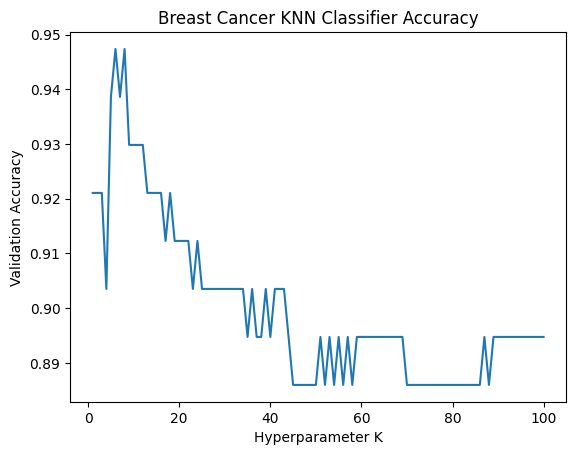

In [7]:
# plot the accuracy curve for varying values of k
k_list = range(1,101)

plt.plot(k_list, accuracies)
plt.xlabel("Hyperparameter K")
plt.ylabel("Validation Accuracy")
plt.title("Breast Cancer KNN Classifier Accuracy")
plt.show()

In [9]:
# after visual inspection, determine the exact optimal value of K
optimal_k = accuracies.index(max(accuracies)) + 1 # +1 to convert index to k
print("Optimal value of hyperparameter K:", optimal_k) 

Optimal value of hyperparameter k: 6


In [10]:
# verify the result above
print(accuracies[20]) 

0.9122807017543859


# Conclusions
Based on visual inspection above, I could tell there were two values of K with equal accuaracies: K=6 and K=8. 
The function I used to determine the maximum K finds the first index where the max occurs, therefore resulting in a value of 6.
Although 6 and 8 are both valid, I would use K=6 to reduce the model's computational workload. 
One thing to keep in mind is that even K values might run into cases where there's an even split between closest labels - therefore I would also consider K=5 or K=7.